In [1]:
import numpy as np
import pymongo
import datetime
import nltk

from nltk import *
from nltk.tokenize import RegexpTokenizer
from pymongo import MongoClient
from sklearn import preprocessing
from nltk.corpus import stopwords
# Data time range


START = datetime.datetime(2014,1,1)
END = datetime.datetime.now()

# Mongo Settings
# MONGO_SERVER = '127.0.0.1'
MONGO_SERVER = '192.168.99.100'
MONGO_PORT = 27017


# data start time and end time
start = START
end = END
delta = end - start


client = MongoClient(MONGO_SERVER, MONGO_PORT)
reuters_raw = client.reuters_db
deal_data= client.deal_data

def split_text(data):
    """
    Spilt sentence to tokens and remove stopwords and punctuations
    """
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(str(data))
    filtered_words = [token for token in tokens if token.lower() not in stopwords.words('english')]
    return filtered_words


def unusual_words(text):
    """
    Detect typo
    """
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

def lookahead(iterable):
    """
    Pass through all values from the given iterable, augmented by the
    information if there are more values to come after the current one
    (True), or if it is the last value (False).
    """
    # Get an iterator and pull the first value.
    it = iter(iterable)
    last = next(it)
    # Run the iterator to exhaustion (starting from the second value).
    for val in it:
        # Report the *previous* value (more to come).
        yield last, True
        last = val
    # Report the last value.
    yield last, False


def insert2db(raws,method,db_collections, start_date):
    data_list = []
    for t, hasmore in lookahead(raws):
        print(t['article_headline'])
        data_list += (method(t['article_text']))
        print("start!")
        if not hasmore:
            print("done!")
            db_collections.insert_one({
                "date":start_date,
                "tokens": data_list
            })

In [2]:
for i in range(1 + 1):
    start_date = start + datetime.timedelta(days=i)
    end_date = start + datetime.timedelta(days=(i+1))

    raws = reuters_raw.business.find({
        "publish_date": {
            "$gte": start_date, 
            "$lt":end_date 
        }
    })
    
    insert2db(raws, split_text, deal_data.daily_tokens, start_date)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:72: DeprecationWarning: generator 'lookahead' raised StopIteration


In [5]:
for i in range(delta.days + 1):
    start_date = start + datetime.timedelta(days=i)
    end_date = start + datetime.timedelta(days=(i+1))
    print(start_date)
    print(end_date)

2014-01-01 00:00:00
2014-01-02 00:00:00
2014-01-02 00:00:00
2014-01-03 00:00:00
2014-01-03 00:00:00
2014-01-04 00:00:00
2014-01-04 00:00:00
2014-01-05 00:00:00
2014-01-05 00:00:00
2014-01-06 00:00:00
2014-01-06 00:00:00
2014-01-07 00:00:00
2014-01-07 00:00:00
2014-01-08 00:00:00
2014-01-08 00:00:00
2014-01-09 00:00:00
2014-01-09 00:00:00
2014-01-10 00:00:00
2014-01-10 00:00:00
2014-01-11 00:00:00
2014-01-11 00:00:00
2014-01-12 00:00:00
2014-01-12 00:00:00
2014-01-13 00:00:00
2014-01-13 00:00:00
2014-01-14 00:00:00
2014-01-14 00:00:00
2014-01-15 00:00:00
2014-01-15 00:00:00
2014-01-16 00:00:00
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-17 00:00:00
2014-01-18 00:00:00
2014-01-18 00:00:00
2014-01-19 00:00:00
2014-01-19 00:00:00
2014-01-20 00:00:00
2014-01-20 00:00:00
2014-01-21 00:00:00
2014-01-21 00:00:00
2014-01-22 00:00:00
2014-01-22 00:00:00
2014-01-23 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00
2014-01-24 00:00:00
2014-01-25 00:00:00
2014-01-25 00:00:00
2014-01-26 00:00:00


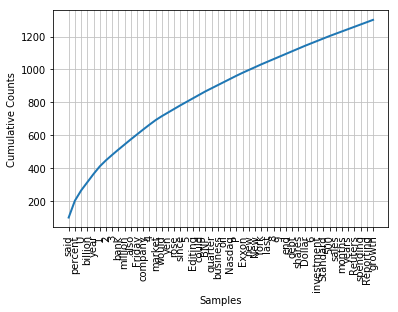

In [11]:
# for i in range(1 + 1):
start_date = start + datetime.timedelta(days=200+i)
end_date = start + datetime.timedelta(days=(200+i+1))

raws = deal_data.daily_tokens.find({
        "date": {
            "$gte": datetime.datetime(2014,10,29), 
            "$lt": datetime.datetime(2014,11,1) 
        }
    })

fdist = FreqDist(raws[0]['tokens'])
fdist.plot(50, cumulative=50)
    
#     insert2db(raws, split_text, deal_data.daily_tokens, start_date)

In [13]:
nltk.pos_tag(raws[0]['tokens'])

[('Sony', 'NNP'),
 ('Corp', 'NNP'),
 ('posted', 'VBD'),
 ('smaller', 'JJR'),
 ('expected', 'JJ'),
 ('second', 'JJ'),
 ('quarter', 'NN'),
 ('operating', 'VBG'),
 ('loss', 'NN'),
 ('Friday', 'NNP'),
 ('hailed', 'VBD'),
 ('finance', 'NN'),
 ('chief', 'NN'),
 ('proof', 'JJ'),
 ('Japanese', 'JJ'),
 ('group', 'NN'),
 ('restructuring', 'VBG'),
 ('program', 'NN'),
 ('paying', 'VBG'),
 ('company', 'NN'),
 ('said', 'VBD'),
 ('reduced', 'JJ'),
 ('operating', 'NN'),
 ('loss', 'NN'),
 ('due', 'JJ'),
 ('part', 'NN'),
 ('rising', 'VBG'),
 ('sales', 'NNS'),
 ('image', 'NN'),
 ('sensors', 'NNS'),
 ('smartphone', 'VBP'),
 ('manufacturers', 'NNS'),
 ('though', 'IN'),
 ('poor', 'JJ'),
 ('showing', 'VBG'),
 ('Xperia', 'NNP'),
 ('phones', 'NNS'),
 ('weighed', 'VBD'),
 ('heavily', 'RB'),
 ('results', 'NNS'),
 ('Sales', 'NNS'),
 ('image', 'NN'),
 ('sensors', 'NNS'),
 ('used', 'VBD'),
 ('Apple', 'NNP'),
 ('iPhones', 'NNS'),
 ('increasingly', 'RB'),
 ('Chinese', 'JJ'),
 ('made', 'VBN'),
 ('handsets', 'NNS'),
 (